---

## Universidad de Costa Rica
### Escuela de Ingeniería Eléctrica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

Segundo semestre del 2020

---

* Estudiante: **Karol Hernández Morera**
* Carné: **B63367**
* Grupo: **1**


# `P1` - *La ley de Benford desde cerca*

> Este proyecto reúne herramientas de programación y la teoría clásica de la probabilidad en un estudio de aplicación con la ley de Benford como parte ejemplo de aplicación.

---

* Elaboración de nota teórica y demostración: **Jeaustin Sirias Chacón**, como parte de IE0499 - Proyecto Eléctrico: *Estudio y simulación de aplicaciones de la teoría de probabilidad en la ingeniería eléctrica*.
* Revisión: **Fabián Abarca Calderón**

## 0. - Introducción: ley de Benford

### 0.1. - Historia

En el año 1881, el astrónomo Simon Newcomb tuvo la curiosidad de observar que las hojas en uno de sus libros de tablas numéricas se encontraban notablemente más desgastadas cuando el primer dígito en las tablas de las páginas iniciaban particularmente con el número 1.


<img align='center' src='https://media.giphy.com/media/DHqth0hVQoIzS/giphy.gif'>


Este detalle lo condujo a postular que probabilísticamente era más posible dar con un 1 como dígito inicial, y así sucesivamente las posibilidades se reducían para los números (2, 3, ..., 9), un hecho que resulta contraintuitivo. 

Ya para 1930, el físico Frank Benford de forma independiente sometió la información histórica de eventos cotidianos que incluían constantes físicas, contenidos estadísticos poblacionales, áreas geográficas y otros con el objetivo de verificar que el primer dígito distinto de cero observado aparece con menor frecuencia con valores más grandes, bajo un comportamiento logarítmico. Posteriormente Ted Hill finalmente formalizó esta hipótesis de años dando paso a la *Ley de números anómalos de Benford - Newcomb*.

Algunos escenarios donde se puede poner a prueba la ley de Benford pueden ser:

* Información histórica de una variable climática: temperatura, precipitación, radiación solar...
* El número de "likes" en cada post de una celebridad reconocida en Instagram.
* El número en las placas vehiculares observadas durante todo un día en la GAM.
* La cantidad de nuevos casos positivos, diarios *en cada cantón* desde el inicio de la pandemia del COVID-19 en Costa Rica.
* Los nacimientos diarios a nivel nacional desde 1990 hasta el presente.
* Los precios de los productos en un supermercado o en una tienda.

### 0.2. - Actividad previa sugerida

* El episodio 4 de la temporada 1 de la serie "Conexiones" en Netflix explora esta ley de forma entretenida, pueden echarle un vistazo.
* También el video ["Number 1 and Benford's Law - Numberphile"](https://youtu.be/XXjlR2OK1kM) de Numberphile en YouTube (en inglés) es una buena introducción.

### 0.3. - Postulado

> Sea $i$ la primera cifra no nula en una magnitud aleatoria tal que $i = {1, 2, 3, ..., 9}$. La probabilidad de ocurrencia de $i$ es:
> 
> $$\displaystyle P(i) = \log{(i + 1)} - \log{i} $$

## 1. - Implementación de una evaluación de la ley de Benford con datos reales

Resulta relevante la posibilidad de implementar una breve rutina en Python capaz de corroborar la ley de Benford a partir de una base de datos local, de la que se intuye puede seguir dicho patrón. Para iniciar se importan las siguientes librerías científicas conocidas.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

Es útil aprovechar los conocimientos en programación **orientada a procedimientos** para definir un flujo de ejecución sencillo. 

Una estrategia funcional es definir una cadena de funciones con procedimientos separados que operen sobre una base datos, con los pasos descritos a continuación. 

### 1.1. - Adquisición de datos

Una función que lea la base de datos en formato `csv` y la convierta en una lista, o `array`. 

**Nota**: La función `loc` de Pandas se utiliza para acceder un grupo de filas y columnas por etiqueta.

In [81]:
import pandas as pd
import numpy as np

def leerdatos(datos, indice): 
    '''
    Carga los datos contenidos en el
    archivo 'datos.csv' y elige la columna indice
    '''
    
    data = pd.read_csv(datos, header=None, skiprows=1, index_col=0)
    
    # Extraer lista con los valores a estudiar
    vector = np.array(data.loc[str(indice)])
    
    return vector

### 1.2. - Lectura del primer dígito

Una función que tome la lista anterior y lea el primer dígito no nulo en cada uno de los elementos, ademas de contar su ocurrencia (frecuencia relativa) y probabilidad:

In [82]:
import numpy as np

def primerdigito(vector):
    '''
    Encuentra el número de ocurrencias de cada primer dígito,
    junto con su probabilidad (frecuencia relativa), y la
    suma total de dígitos presentes.
    '''
    
    # Inicializar las variables a utilizar
    digitoprimero = []
    caracteres = []
    ocurrencias = []

    # Convertir en cadenas de caracteres y descartar ceros
    for v in vector:
        if v == 0: 
            continue
        else: 
            caracteres.append(str(v))

    # Leer el primer símbolo de cada cadena de caracteres
    for c in caracteres:
        if c[0] == '0': 
            digitoprimero.append(int(c[2]))
        else: 
            digitoprimero.append(int(c[0]))

    # Leer las repeticiones de 1, 2, ..., 9 en digitoprimero
    for digito in range(1, 10):
        contador = digitoprimero.count(digito)
        ocurrencias.append(contador)
    
    # Calcular total y porcentajes
    total = sum(ocurrencias)
    porcentajes = np.array([i/total for i in ocurrencias])

    # Retornar el número de ocurrencias, porcentajes y total 
    return ocurrencias, porcentajes, total

### 1.3. - Determinación de valores esperados teóricos

Una función que calcule el número de aciertos pronosticados para la cantidad de datos analizados, usando la probabilidad de ocurrencia de cada dígito, según Benford:

In [83]:
import numpy as np

def conteoesperado(total):
    '''
    Para una cantidad de datos total dada, encuentra
    la cantidad esperada de ocurrencias de cada 
    dígito según la ley de Benford
    '''
    # Probabilidades con la ley de Benford
    probabilidades = [np.log10(i+1) - np.log10(i) for i in range(1,10)]
    
    # Número de ocurrencias pronosticadas
    cantidades = np.array([round(p*total) for p in probabilidades]) 

    return cantidades, probabilidades

### 1.4. - Resumen y visualización de resultados

Una función que visualice  e imprima un resumen sobre la base de los procedimientos anteriores:

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def resumen(dataset, ObsCounts, ExpCounts, pReal, bfVals):

    print('Resumen de conteos por símbolo:')
    print('Conteos observados: {}'.format(ObsCounts))
    print('Conteos predichos: {}'.format(ExpCounts))
    print("\n\n\nProbabilidad de ocurrencia por símbolo (1, 2, ..., 9):\n")

    for i in np.arange(0, 9, 1):
        print('Para {num}: Probabilidad observada: {p1}, Probabilidad por Benford: {p2}'.format(num = i +1, 
                                                                                    p1 = round(pReal[i], 3),                                                                            p2 = round(bfVals[i]/100, 3)))
    # Visualización
    plt.rcParams['axes.grid'] = True # fijar grillas en On para cada subfigura
    
    fig = plt.figure(tight_layout=True, figsize=(11, 8))
    figGrid = gridspec.GridSpec(2, 2)
    rawData = fig.add_subplot(figGrid[0, 0])
    dataHist = fig.add_subplot(figGrid[0, 1])
    benfordFreq = fig.add_subplot(figGrid[1, 0])
    benfordDist = fig.add_subplot(figGrid[1, 1])

    # Eje x: linspaces
    xData = np.arange(0, len(dataset), 1)
    xDigits = np.arange(1, 10, 1)

    # RawData plot
    rawData.plot(xData, dataset, color='tab:red')
    rawData.set_xlabel('Tiempo')
    rawData.set_ylabel('Variable física')
    rawData.set_title('Comportamiento histórico de la variable')

    # dataHist
    dataHist.hist(dataset, bins=25, color='g', histtype='bar', rwidth=0.8)
    dataHist.set_ylabel('Frequencia')
    dataHist.set_xlabel('Variable física ')
    dataHist.set_title('Histograma')

    # benfordDist
    benfordDist.bar(xDigits, ObsCounts, 
                    color='teal', label='Ocurrencias observadas en datos')

    for i in  xDigits:
        if i == xDigits[-1]:
            benfordDist.plot(i, ExpCounts[i-1], marker='s', markersize=8, color='firebrick', label='Ocurrencias esperadas según Benford')
        else:
            benfordDist.plot(i, ExpCounts[i-1], marker='s', markersize=8, color='firebrick')

    benfordDist.set_xlabel('Primer dígito')
    benfordDist.set_xticks(xDigits)
    benfordDist.set_xticklabels(('1', '2', '3', '4', '5', 
                                 '6', '7', '8', '9'))
    benfordDist.set_ylabel('Número de ocurrencias')
    benfordDist.set_title('Distribución por cifra')
    benfordDist.legend()

    # benfordFreq plot
    benfordFreq.plot(xDigits, pReal, 
                     color='orangered', lw=3, 
                     label='Probabilidad por ocurrencias observadas')
    benfordFreq.plot(xDigits, bfVals, 
                     '--', color='tab:blue', lw=3, 
                     label='Lo que predijo Benford')
    benfordFreq.set_xlabel('Primer dígito')
    benfordFreq.set_ylabel('Probabilidad')
    benfordFreq.set_title('Probabilidad por dígito dominante')

    benfordFreq.legend()

    fig.align_labels()
    plt.show()

### ¿Y ahora?

Entonces bien, se facilita hacer llamadas a funciones en el orden anterior. Para este ejemplo se utilizará una base de datos que contiene los registros de la precipitación histórica en decadías desde 1985 hasta 2019 para algunas localizaciones de Costa Rica. Dicho dominio es un candidato aceptable dado a que:

* Se cuenta con una elevada cantidad de muestras. *¿Cuántas decadías hay desde 1985 hasta 2019?*
* La precipitación es una variable física, por lo que no son valores aleatorios.




**Un dato interesante**: Un mes tiene tres [decadías](http://iridl.ldeo.columbia.edu/maproom/Food_Security/Locusts/Regional/Dekadal_Rainfall/index.html) (*dekadal*, en inglés), en donde las dos primeras tienen 10 días; es decir, 20 en total. La tercera decadía depende de cuántos días le resten al mes para terminar; por ejemplo, la tercera decadía de enero tiene 11, la de febrero, a lo sumo 9 (si es un año bisiesto) y del mismo modo para los meses siguientes. En total un año contendrá 36 decadías.

Resumen de conteos por símbolo:
Conteos observados: [372, 176, 104, 103, 78, 65, 59, 65, 60]
Conteos predichos: [326. 191. 135. 105.  86.  72.  63.  55.  50.]



Probabilidad de ocurrencia por símbolo (1, 2, ..., 9):

Para 1: Probabilidad observada: 0.344, Probabilidad por Benford: 0.003
Para 2: Probabilidad observada: 0.163, Probabilidad por Benford: 0.002
Para 3: Probabilidad observada: 0.096, Probabilidad por Benford: 0.001
Para 4: Probabilidad observada: 0.095, Probabilidad por Benford: 0.001
Para 5: Probabilidad observada: 0.072, Probabilidad por Benford: 0.001
Para 6: Probabilidad observada: 0.06, Probabilidad por Benford: 0.001
Para 7: Probabilidad observada: 0.055, Probabilidad por Benford: 0.001
Para 8: Probabilidad observada: 0.06, Probabilidad por Benford: 0.001
Para 9: Probabilidad observada: 0.055, Probabilidad por Benford: 0.0


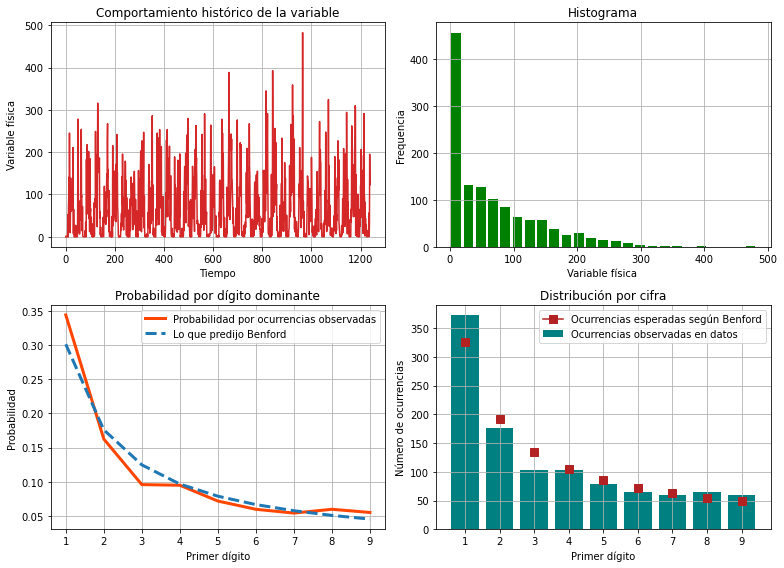

In [85]:
'''
Cargar la base de datos.
La base de datos tiene las siguientes conjuntos:
Poás, Liberia, Carara, La Pita, Prusia, Rodeo...
'''
data = leerdatos('rainfall.csv', 'Poas') 

'''
Calcular el número de ocurrencias de {1, 2, ..., 9}
en el primer digito de cada elemento de la lista.
'''
ocurrencias, prob_ocurrencias, conteos_totales = primerdigito(data)

'''
Calcular las ocurrencias esperadas según la ley de Benford
'''
ocurrencias_predichas, prob_benford = conteoesperado(conteos_totales)

'''
Visualizar los resultados
'''
resumen(data, ocurrencias, ocurrencias_predichas, prob_ocurrencias, prob_benford)

### Observaciones

* La mayoría de las muestras de precipitación ocurridas tienen magnitudes entre los 0 mm y 100 mm.
* Se corrobora que el número de ocurrencias por símbolo en el dígito dominante es menos frecuente conforme aumenta su valor; por ejemplo, 1 obtuvo un 34.4 % de las ocurrencias; 2, un 16.3 % y 9, un 4.6 %. *¿Sigue este comportamiento la ley de Benford?*

## 2. - Asignaciones del proyecto

Las siguientes secciones debe completarlas cada estudiante con ayuda de la teoría y funciones presentadas anteriormente, y utilizando la teoría clásica de probabilidad, en particular recordando el teorema de Bayes:

$$
P(A \mid B) = \frac{P(A) P(B \mid A)}{P(B)}
$$

### 2.1. - Estudio de las probabilidades condicionales de ocurrencia del segundo dígito

La ley de Benford establece una probabilidad de ocurrencia del primer dígito, pero ¿qué sabemos del segundo dígito? ¿Tiene alguna dependencia con la ocurrencia del primer dígito?

Para ayudarnos a responder la pregunta, es necesario hacer un estudio de la ocurrencia de los números en los segundos dígitos en la muestra de datos anteriormente presentada.

* Sea $A$ la ocurrencia del primer dígito. Sea $A_i$ la presencia del número $i = \{ 1, 2, \ldots, 9 \}$ en el primer dígito. Ejemplo: en la magnitud 49274 ocurrió $A_4$.
* Sea $B$ la ocurrencia del segundo dígito. Sea $B_j$ la presencia del número $j = \{ 1, 2, \ldots, 9 \}$ en el segundo dígito. Ejemplo: en la magnitud 49274 ocurrió $B_9$.

La probabilidad de que el segundo dígito sea, por ejemplo, 7, dado que el primer dígito fue 1 se enunciará como $P(B_7 \mid A_1)$.

* **(40 %)** Realice un estudio de todas las combinaciones de las probabilidades condicionales $P(B_j \mid A_i)$ para el conjunto de datos estudiado aquí.

In [86]:
# Primera parte

'''
------
P(B ∣ A) = P(A n B) / P(A)
------ 

P(A n B) / P(A) = n(A n B) / n(A)

------
P(A n B) = P(A) P(B ∣ A)
------
'''

# Trabajo previo opcional: acondicionamiento de datos.

'''
Observaciones:

- No hay "anomalías" como "leading zeros"
- Hay algunos números que son 0 (hay que descartarlos)
- Hay algunos números que son menores a 1
- Para este estudio nos interesan únicamente los primeros dos dígitos significativos
'''

import numpy as np   # Se importa la librería numpy.
import pandas as pd  # Se importa la librería pandas.


# Se crea una función para leer los datos del documento Csv.

def leerdatos(datos, indice): 
    '''
    Carga los datos contenidos en el
    archivo 'datos.csv' y elige la columna indice
    '''
    
    data = pd.read_csv(datos, header=None, skiprows=1, index_col=0)
    
    # Extraer lista con los valores a estudiar.
    vector = np.array(data.loc[str(indice)])
    
    return vector

lluvias = leerdatos('rainfall.csv', 'Poas')  # En el ejercicio se solicitan los valores del sector Poás.

#-------------------------------------------------------------------------------------------------------------------------

 # Inicializar las variables a utilizar para obtener el primer dígito de los datos.
    
digitoprimero = []  #Variable para contener los primeros dígitos significativos.
caracteres = []     #Variable para contener las valores en string.
ocurrencias = []    #Variable para la ocurrencias del primer dígito.


# Convertir en cadenas de caracteres y descartar los ceros.
for v in lluvias:
    if v == 0: 
        continue
    else: 
        caracteres.append(str(v))
             

# Leer el primer símbolo de cada cadena de caracteres.
for c in caracteres:
    if c[0] == '0': 
        digitoprimero.append(int(c[2]))
    else: 
        digitoprimero.append(int(c[0]))   


 # Leer las repeticiones de 1, 2, ..., 9 en digitoprimero.
for digito in range(1, 10):
    contador = digitoprimero.count(digito)
    ocurrencias.append(contador)





In [87]:
#Para obtener los valores del segundo dígito significativo.
# Se procede a limpiar los valores de los datos, para facilitar el procedimento para localizar los dígitos que se solicitan.



# Descartar ceros mediante el metódo de Numpy nonzero.
sinceros = lluvias[np.nonzero(lluvias)] 


# Quitar decimales, ya que al multiplicar por 100 los valores se vuelven enteros.
sindecimales = sinceros*100

# Convertir en caracteres para manipularlos en forma de string.
caracteres = sindecimales.astype(str)

# Convertir en dos dígitos nada más.
dosdigitos = np.empty(np.shape(caracteres))
for i, c in enumerate(caracteres):
    dosdigitos[i] = c[0] + c[1] 


# Convertir en un vector de caracteres.
numeros = dosdigitos.astype(int).astype(str)


# Valores posibles del primer dígito.
I = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

# Valores posibles del segundo dígito.
J = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

# Vector de ocurrencias del primer dígito.
nA = ocurrencias

#-------------------------------------------------------------------------------------------------------------------------
# Se determina para que la matriz empiece en la posición cero hasta el tamaño del vector de I y J.
Bj_Ai = np.zeros((len(I), len(J))) 

# Recorrer todas las combinaciones del primer y segundo dígito.
for i, fila in enumerate(I):                   # Contador primer dígito.
    for j, columna in enumerate(J):            # Contador segundo digíto.
        nAB = 0                                # Inicia el contador para la relación entre el primer y el segundo dígito.
        for n in numeros:                      # Contador para la lista de datos numeros.
            if len(n) >= 2:                    # Si el contador n es igual a 2 o más, entonces los valores son obtenidos.
                if n[0] == fila and n[1] == columna: # El primer dígito se agrega a fila y el segundo a la columna.
                    nAB += 1                    #Reitera el contador si se cumple la condición.
        try:
            Bj_Ai[i, j] = nAB / nA[i]          #Probabilidad condicional del segundo dígito respecto al primero.
        except:
            Bj_Ai[i, j] = np.NaN               # Resultado cuando nAB es cero. 


# Imprimir cada probabilidad condicional.
for i, fila in enumerate(I):
    for j, columna in enumerate(J):
        print('P({} ∣ {}) = {:02.4f}'.format(columna, fila, Bj_Ai[i, j]))

#La ley de Benford establece una probabilidad de ocurrencia del primer dígito, pero ¿qué sabemos del segundo dígito?
#¿Tiene alguna dependencia con la ocurrencia del primer dígito?  
'''
 La distribución de las probabilidades para el segundo dígito según Benford, tiende ser un poco más uniforme que la presentada 
 para el primer dígito. Respecto a la ley del segundo dígito significativo, si se necesita conocer el valor del primer 
 dígito, pero no depende en sí de las ocurrencias de este (al menos de que se hable de probabilidad condicionada),
 como se mencionó anteriormente estas probabilidades son muy similares en valor, por lo tanto son independientes de las
 ocurrencias.
 
 Con el empleo de los valores de esta práctica, este comportamiento no corresponde con Benford, ya que son cifras donde se 
 excluye el cero como dígito, en el proceso de extracción de la segunda cifra, igualmente hay valores que poseen un solo elemento,
 por esto el comportamiento no corresponde.
 
'''


P(1 ∣ 1) = 0.1344
P(2 ∣ 1) = 0.0995
P(3 ∣ 1) = 0.1156
P(4 ∣ 1) = 0.1398
P(5 ∣ 1) = 0.0995
P(6 ∣ 1) = 0.0887
P(7 ∣ 1) = 0.0538
P(8 ∣ 1) = 0.0699
P(9 ∣ 1) = 0.0726
P(1 ∣ 2) = 0.1136
P(2 ∣ 2) = 0.0852
P(3 ∣ 2) = 0.0795
P(4 ∣ 2) = 0.1136
P(5 ∣ 2) = 0.1193
P(6 ∣ 2) = 0.0966
P(7 ∣ 2) = 0.0682
P(8 ∣ 2) = 0.0568
P(9 ∣ 2) = 0.0909
P(1 ∣ 3) = 0.1250
P(2 ∣ 3) = 0.0673
P(3 ∣ 3) = 0.0481
P(4 ∣ 3) = 0.0865
P(5 ∣ 3) = 0.0962
P(6 ∣ 3) = 0.0481
P(7 ∣ 3) = 0.0865
P(8 ∣ 3) = 0.1442
P(9 ∣ 3) = 0.1154
P(1 ∣ 4) = 0.0291
P(2 ∣ 4) = 0.0485
P(3 ∣ 4) = 0.1068
P(4 ∣ 4) = 0.0680
P(5 ∣ 4) = 0.1359
P(6 ∣ 4) = 0.0971
P(7 ∣ 4) = 0.1165
P(8 ∣ 4) = 0.0971
P(9 ∣ 4) = 0.0777
P(1 ∣ 5) = 0.0769
P(2 ∣ 5) = 0.1282
P(3 ∣ 5) = 0.0513
P(4 ∣ 5) = 0.0769
P(5 ∣ 5) = 0.1282
P(6 ∣ 5) = 0.1154
P(7 ∣ 5) = 0.0769
P(8 ∣ 5) = 0.0897
P(9 ∣ 5) = 0.1026
P(1 ∣ 6) = 0.0923
P(2 ∣ 6) = 0.1692
P(3 ∣ 6) = 0.1077
P(4 ∣ 6) = 0.1077
P(5 ∣ 6) = 0.0923
P(6 ∣ 6) = 0.0462
P(7 ∣ 6) = 0.0462
P(8 ∣ 6) = 0.0923
P(9 ∣ 6) = 0.0769
P(1 ∣ 7) = 0.0508
P(2 ∣ 7) =

'\n La distribución de las probabilidades para el segundo dígito según Benford, tiende ser un poco más uniforme que la presentada \n para el primer dígito. Respecto a la ley del segundo dígito significativo, si se necesita conocer el valor del primer \n dígito, pero no depende en sí de las ocurrencias de este (al menos de que se hable de probabilidad condicionada),\n como se mencionó anteriormente estas probabilidades son muy similares en valor, por lo tanto son independientes de las\n ocurrencias.\n \n Con el empleo de los valores de esta práctica, este comportamiento no corresponde con Benford, ya que son cifras donde se \n excluye el cero como dígito, en el proceso de extracción de la segunda cifra, igualmente hay valores que poseen un solo elemento,\n por esto el comportamiento no corresponde.\n \n'

### 2.2. - Hallazgos de las probabilidades condicionales de los segundos dígitos

¿Cuál es nuestra intuición respecto al problema anterior? ¿Son los segundos dígitos independientes del primer dígito? ¿Cumplen con cierta variación de la ley de Benford?

* **(20 %)** Genere gráficas apropiadas para mostrar la relación de dependencia que tiene o no tiene $B_j$ con $A_i$.

'\n¿Cuál es nuestra intuición respecto al problema anterior? ¿Son los segundos dígitos independientes del primer dígito? \n¿Cumplen con cierta variación de la ley de Benford?\n-----------------------------------------------------------------------------------------------------------------------\nRespecto a la concepción del comportamiento de las probabilidades, no se comportan como la ley de Benford. No, con \nP(B_2 ∣ A_i) = P(A_i n B_2) / P(A_i) se demuestra que la probabilidad es condicionada, por lo tanto se deben de tomar en\ncuenta las probabilidades de A que serían los primeros dígitos es necesaria para determinar la probabilidad condicionada \ndel segundo dígito, es decir son dependientes. \n\nEn cuanto en ley de Benford, la probabilidad condicionada del segundo dígito está dada por:\n\nP(B_2 ∣ A_i) = ((log(10*A_i) + B_2 + 1)/(log((10*A_i) + B_2))/(log((A_i + 1)/A_i))\n\nnota: (log((A_i + 1)/A_i)) es la probabilidad del primer dígito y la parte del numerador, corresponde a  P(A_

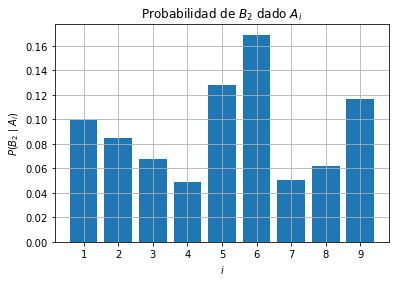

In [88]:
# Segunda parte

import matplotlib.pyplot as plt #Se importa la librería Matplotlib para gráficar el comportamiento condicionado.

# i son  los primeros dígitos.
# j son los segundos dígitos.
#Los segundos dígitos respecto los valores del primer dígito.


j = 2  # Se escoje B2 para ejemplificar el comportamiento condicional de 2 respecto a los primeros dígitos. 

plt.bar(I, Bj_Ai[:,j-1])   # Gráficar los resultados en forma de barras.
plt.title('Probabilidad de $B_{}$ dado $A_i$'.format(j))
plt.xlabel('$i$')
plt.ylabel('$P(B_{} \mid A_i)$'.format(j))




'''
¿Cuál es nuestra intuición respecto al problema anterior? ¿Son los segundos dígitos independientes del primer dígito? 
¿Cumplen con cierta variación de la ley de Benford?
-----------------------------------------------------------------------------------------------------------------------
Respecto a la concepción del comportamiento de las probabilidades, no se comportan como la ley de Benford. No, con 
P(B_2 ∣ A_i) = P(A_i n B_2) / P(A_i) se demuestra que la probabilidad es condicionada, por lo tanto se deben de tomar en
cuenta las probabilidades de A que serían los primeros dígitos es necesaria para determinar la probabilidad condicionada 
del segundo dígito, es decir son dependientes, sin embargo esta dependencia disminuye a medida que aumenta la distancia
entre los dígitos que se esten empleando.

En cuanto en ley de Benford, la probabilidad condicionada del segundo dígito está dada por:

P(B_2 ∣ A_i) = ((log(10*A_i) + B_2 + 1)/(log((10*A_i) + B_2))/(log((A_i + 1)/A_i))

nota: (log((A_i + 1)/A_i)) es la probabilidad del primer dígito y la parte del numerador, corresponde a  P(A_i n B_2).

por ejemplo si se calcula P(B_2 ∣ A_6) con Benford es = 0.1037
mientras que como se observa en los valores calculados P(B_2 ∣ A_6) da 0.1692

Con el procedimiento anterior demostramos que no cumple con la variación que proporciona Benford. 
'''


### 2.3. - Probabilidad condicional inversa

Es posible invertir la pregunta (como lo hace el teorema de Bayes) y cuestionarse: dada la ocurrencia de $B_j$, ¿que probabilidades existen de que ocurriera $A_i$?

Esta pregunta podría revelar alguna otra "anomalía" contraintuitiva como la que describe originalmente la ley de Benford.

Sea su carné LNNNNN, donde L es una letra y N un dígito decimal. Sea X = el último dígito N no nulo ($\neq 0$) y sea Y = el penúltimo dígito N no nulo. Ejemplo: para B16009, X = 9 y Y = 6.

* **(40 %)** Calcular la probabilidad de que en el conjunto grande de magnitudes utilizado el primer dígito sea X, dado que el segundo dígito fue Y.

In [1]:
# Tercera parte

# carné B63367

#X = 7 = i
#Y = 6 = j


P2=5 # Posición del segundo dígito.


#PAI # Calcular total y porcentajes de los primeros dígitos.

total = sum(ocurrencias)
prob1 = np.array([i/total for i in ocurrencias])

PAI= prob1


# Probabilidad total. 
# P(B6) = P(A1) P(B6 ∣ A1) + P(A2) P(B6 ∣ A2) + P(A3) P(B6 ∣ A3) 
#+ ... + P(A9) P(B6 ∣ A9)


# Fórmula para calcular la probabilidad total de PB6.
PB_6= (PAI[0])*(Bj_Ai[0,P2]) + (PAI[1])*(Bj_Ai[1,P2]) + (PAI[2])*(Bj_Ai[2,P2]) + (PAI[3])*(Bj_Ai[3,P2])
+ (PAI[4])*(Bj_Ai[4,P2]) + (PAI[5])*(Bj_Ai[5,P2]) + (PAI[6])*(Bj_Ai[6,P2]) + (PAI[7])*(Bj_Ai[7,P2])
+(PAI[8])*(Bj_Ai[8,P2])


print('La probabilidad total de P(B_6) =', PB_6) #  Probabilidad total de PB6.


#Probabilidad Condicionada Inversa.
#P(A7 ∣ B6) = P(A7) P(B6 ∣ A7) / P(B6)  
P7_6= ((PAI[6] * (Bj_Ai[6,5]))/ PB_6)


#Se imprime la Probabilidad Condicionada Inversa P(A7 ∣ B6)
print('La probabilidad condicionada inversa para obtener P(A_7 ∣ B_6) =', P7_6* 100, '%' )
 
#---------------------------------------------------------------------------------------------------------------------------



NameError: name 'ocurrencias' is not defined

---

### Universidad de Costa Rica
#### Facultad de Ingeniería
##### Escuela de Ingeniería Eléctrica

---